In [1]:
import pandas as pd
words = open('/Users/ezelbayraktar/Documents/DL-NLP/MyLanguageModelJourney/names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
#getting chars 
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [3]:
## implementing a dictionary to enum chars
ctoi={}
ctoi['.'] = 0
i = 1
for char in chars:
    # i do not check if char is in ctoi since chars is already a set so no dupes
    # so it is not possible that char is added to ctos twice
    ctoi[char] = i
    i+=1
ctoi['.']

0

In [4]:
## implementing a dictionary to char nums

## just flipping ctoi since itoc is just the same but with keys and values exchanged
itoc = {value: key for key, value in ctoi.items()}
itoc[0]

'.'

In [5]:
## building ...
import torch
gram = 3
X,Y = [],[]
for w in words:
    #print(w)
    grams = [0]*gram
    for ch in w+'.':
        cai = ctoi[ch] ## cai stands for character as integer
        X.append(grams)
        Y.append(cai)
        #print(itoc[grams[0]],itoc[grams[1]],itoc[grams[2]]," >> ",itoc[cai])
        ##print(ch,cai)
        grams = grams[1:] + [cai]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [7]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [8]:
X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [9]:
# choosing gpu as computational device if gpu is available
# since we are working with small data this step is not necessary indeed
# but i own the repo and do whatever i want... just joking doing it for fun im really stressed out


# MPS: Metal Performance Shaders --> for Mac devices with M chips
# CUDA: For device with cuda support
# CPU: General case
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
Y = Y.to(device)
X = X.to(device)

generator = torch.Generator(device=device)
#seed = 20040324
#generator.manual_seed(seed)

rows = 27 #  english chars + the dot
dimension = 2 # dimensions for each char
params = torch.randn(rows, dimension, generator=generator, device=device)
params
# params are the dimension values our model assigns to characters

tensor([[-1.3736e+00,  3.9266e-01],
        [ 1.0474e+00,  5.9269e-01],
        [ 6.2265e-02, -8.5668e-01],
        [-2.8596e-01,  2.6313e-01],
        [ 1.7229e-01,  2.5927e-01],
        [-1.0883e-03, -3.6440e-01],
        [-7.4800e-01,  6.9759e-01],
        [-2.2528e+00, -2.1919e-01],
        [ 7.0076e-01, -1.1138e+00],
        [-8.8191e-02, -1.0446e+00],
        [-1.3928e+00, -9.6845e-04],
        [ 1.2695e+00, -9.9722e-01],
        [-9.8367e-02,  7.9659e-01],
        [ 1.2109e+00, -2.0763e+00],
        [-1.7025e+00,  7.6926e-01],
        [-2.0471e-01,  1.9653e-01],
        [ 5.4901e-01,  2.1528e+00],
        [ 1.4497e+00,  1.7131e+00],
        [ 9.5621e-01,  1.9685e+00],
        [ 6.2519e-01,  2.4074e-01],
        [ 8.3296e-01,  4.6716e-01],
        [-3.4052e-01, -3.2161e-01],
        [ 3.2996e-01, -1.2689e+00],
        [ 8.2533e-02,  6.1379e-01],
        [-3.4519e-01, -9.7349e-01],
        [-3.5902e-01, -3.3153e-01],
        [-5.4774e-01,  5.5413e-01]], device='mps:0')

In [10]:
## experimenting with indecis
params[2]

tensor([ 0.0623, -0.8567], device='mps:0')

In [11]:
X[10]

tensor([ 9, 22,  9], device='mps:0')

In [12]:
params[X[10]]

tensor([[-0.0882, -1.0446],
        [ 0.3300, -1.2689],
        [-0.0882, -1.0446]], device='mps:0')

In [13]:
params[X[10]].shape

torch.Size([3, 2])

In [14]:
params[X].shape

torch.Size([228146, 3, 2])

In [15]:
# here we still have the gram table actually but each character in each gram is repsrented with dimenstional params
params[X]

tensor([[[-1.3736e+00,  3.9266e-01],
         [-1.3736e+00,  3.9266e-01],
         [-1.3736e+00,  3.9266e-01]],

        [[-1.3736e+00,  3.9266e-01],
         [-1.3736e+00,  3.9266e-01],
         [-1.0883e-03, -3.6440e-01]],

        [[-1.3736e+00,  3.9266e-01],
         [-1.0883e-03, -3.6440e-01],
         [ 1.2109e+00, -2.0763e+00]],

        ...,

        [[-5.4774e-01,  5.5413e-01],
         [-5.4774e-01,  5.5413e-01],
         [-3.5902e-01, -3.3153e-01]],

        [[-5.4774e-01,  5.5413e-01],
         [-3.5902e-01, -3.3153e-01],
         [-5.4774e-01,  5.5413e-01]],

        [[-3.5902e-01, -3.3153e-01],
         [-5.4774e-01,  5.5413e-01],
         [-3.4519e-01, -9.7349e-01]]], device='mps:0')

In [16]:
emb = params[X]


In [17]:


#layer 1
inputNumberLayer1 = (params[X].shape)[2]*(params[X].shape)[1] # input nummber is equal to (grams count) * (dimensions)
inputNumberLayer1
neuronsLayer1 = 200 # matter of choice CAUTION: too much neurons may cause overfitting

W1 = torch.randn(inputNumberLayer1, neuronsLayer1, generator=generator, device=device) # first layer's weights
W1

tensor([[ 0.4057,  0.1224,  0.7896,  ...,  0.5229, -2.4942, -0.9010],
        [-0.8378,  0.9826,  1.2608,  ...,  0.3411, -0.3754, -1.1941],
        [-0.3678,  1.8012,  0.5007,  ..., -1.2406, -0.9563, -1.8918],
        [ 0.7669,  0.0492, -0.7167,  ...,  0.4146, -3.5071, -0.4178],
        [-0.1586,  0.3480, -0.3436,  ..., -0.6795, -1.2412, -0.3884],
        [-1.1859, -1.6101, -2.1689,  ..., -2.0254, -0.2208,  2.0707]],
       device='mps:0')

In [18]:
W1.shape

torch.Size([6, 200])

In [19]:
b1 = torch.randn(200,generator=generator, device=device)

In [20]:
W1.shape, emb.shape #hmmmm.. problem! cannot matrix multiply because of dimensions not holding

(torch.Size([6, 200]), torch.Size([228146, 3, 2]))

In [21]:
#->> emb = torch.cat(torch.unbind(emb,1),1)
#->> emb
## MY EXPLANATION:

## here torch.unbind(emb,1) seperates our tensor across the first dimension (columns) and we get three (32,2) tensors. 
## i was confused when i learned about it at first so here is the explanation. 
## imagine a cube of 32 rows , 3 columns, and 2 layers(depth) we seperate the cube across columns so we are left with three slices
## each of 32 row and 2 depth layers. we concatenate the slices now across the first dimension of each. 
## here is the key! the first dimension now is what was depth layers before. the 2 is now the columns. so when we contatenate
## across the first dimension we combine three two columns to get six columns. the first two are the columns of the first slice
## and the depth layers of the first column we had initially.

## GPT EDITED EXPLANATION

# Imagine 'emb' as a 3D tensor with a shape of (32, 3, 2), where
# 32 represents the depth (layers), 3 represents the rows, and 2 represents the columns.

# Applying torch.unbind(emb, 1) splits 'emb' across the rows (since 1 indicates rows here),
# resulting in 3 tensors, each with a shape of (32, 2) - they have 32 layers (depth) and 2 columns,
# but only 1 row because we've split along the rows.

# These 3 tensors are like 3 flat sheets from our initial cube:
# 1. The first sheet contains the first row from every layer.
# 2. The second sheet contains the second row from every layer.
# 3. The third sheet contains the third row from every layer.

# Now, torch.cat(...) will concatenate these 3 sheets along the first dimension (rows),
# effectively stacking them back to form the original structure but now as separate tensors.

# After concatenation, we have a tensor that resembles the original 'emb' in shape,
# having 32 layers (depth), 3 rows, and 2 columns.
# The first dimension now refers to the rows, the second to the layers (depth), and the third to columns.
# This reassembled structure maintains the original depth and columns but has reorganized the rows.


In [22]:
## ACTUALLY IT IS EASIER TO RESHAPE!! 
## since all tensors are stored as one dimensional arrays in memory we can just reshape the tensor
## but old and new dimensions mul must hold
emb.view(X.shape[0],6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]], device='mps:0')

In [23]:
activation1 = torch.tanh(emb.view(emb.shape[0],emb.shape[1] * emb.shape[2]) @ W1 + b1)
activation1.shape,activation1

(torch.Size([228146, 200]),
 tensor([[ 0.3044, -0.9941, -0.9059,  ...,  0.7740,  0.9999,  0.9998],
         [ 0.7592, -0.8385, -0.3219,  ...,  0.9262,  0.9982,  0.9838],
         [ 0.9410,  0.9997,  0.9995,  ...,  0.9784,  0.9988, -0.9992],
         ...,
         [ 0.7747,  0.3464,  0.7021,  ...,  0.8709,  0.4344,  0.0430],
         [-0.6273, -0.6826, -0.2500,  ..., -0.7306,  0.9979,  0.9613],
         [ 0.9892,  0.5025,  0.8595,  ...,  0.9844,  0.4232, -0.3835]],
        device='mps:0'))

In [24]:
W2 = torch.randn(200,27,generator=generator, device=device)
b2 = torch.randn(27,generator=generator, device=device)

In [25]:
logits = activation1 @ W2 + b2
logits.shape
logits = logits.to(device)


In [26]:
import torch.nn.functional as F



In [27]:
parameters = [params,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True

Iteration 0: 26.76344108581543
Iteration 100: 3.1476993560791016
Iteration 200: 2.7942967414855957
Iteration 300: 2.7025485038757324
Iteration 400: 2.6607797145843506
Iteration 500: 2.6360323429107666
Iteration 600: 2.619171380996704
Iteration 700: 2.606302261352539
Iteration 800: 2.5955100059509277
Iteration 900: 2.5858802795410156
Time elapsed: 506.509202003479 seconds


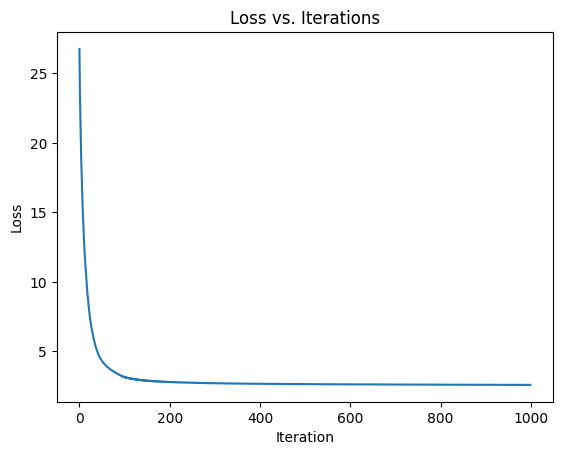

In [28]:
import time
import matplotlib.pyplot as plt

# Initialize lists to store loss values and iteration numbers
loss_values = []
iterations = []

# Start the timer
start_time = time.time()

# Training loop
for iter in range(1000):
    emb = params[X]
    activation1 = torch.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ W1 + b1)
    logits = activation1 @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    
    # Store loss value and iteration number
    loss_values.append(loss.item())
    iterations.append(iter)
    
    if iter % 100 == 0:
        print(f'Iteration {iter}: {loss.item()}')
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

# Print time elapsed
end_time = time.time()
print(f"Time elapsed: {end_time - start_time} seconds")

# Plot loss graph
plt.plot(iterations, loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


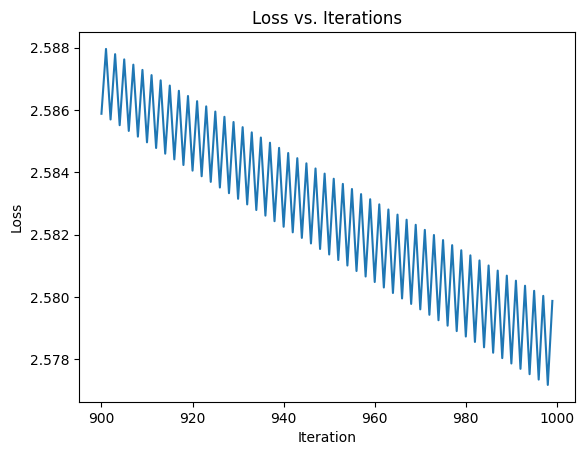

In [34]:
# Plot loss graph
plt.plot(iterations[900:], loss_values[900:])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()